# PQC Spectrum, Analysis

In [1]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams["figure.autolayout"]=True


## Three Qubits, Repeated

In [2]:
[model_list1, model_list2, model_list3, model_list4, model_list5, model_list6, model_list7, model_list8] = loader("../../../data/" + "belem_3qubit_repeated.model")

In [3]:
spectrum_list1 = [channel_spectrum(model.channel, use_coords=True) for model in model_list1]
spectrum_list2 = [channel_spectrum(model.channel, use_coords=True) for model in model_list2]
spectrum_list3 = [channel_spectrum(model.channel, use_coords=True) for model in model_list3]
spectrum_list4 = [channel_spectrum(model.channel, use_coords=True) for model in model_list4]
spectrum_list5 = [channel_spectrum(model.channel, use_coords=True) for model in model_list5]
spectrum_list6 = [channel_spectrum(model.channel, use_coords=True) for model in model_list6]
spectrum_list7 = [channel_spectrum(model.channel, use_coords=True) for model in model_list7]
spectrum_list8 = [channel_spectrum(model.channel, use_coords=True) for model in model_list8]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


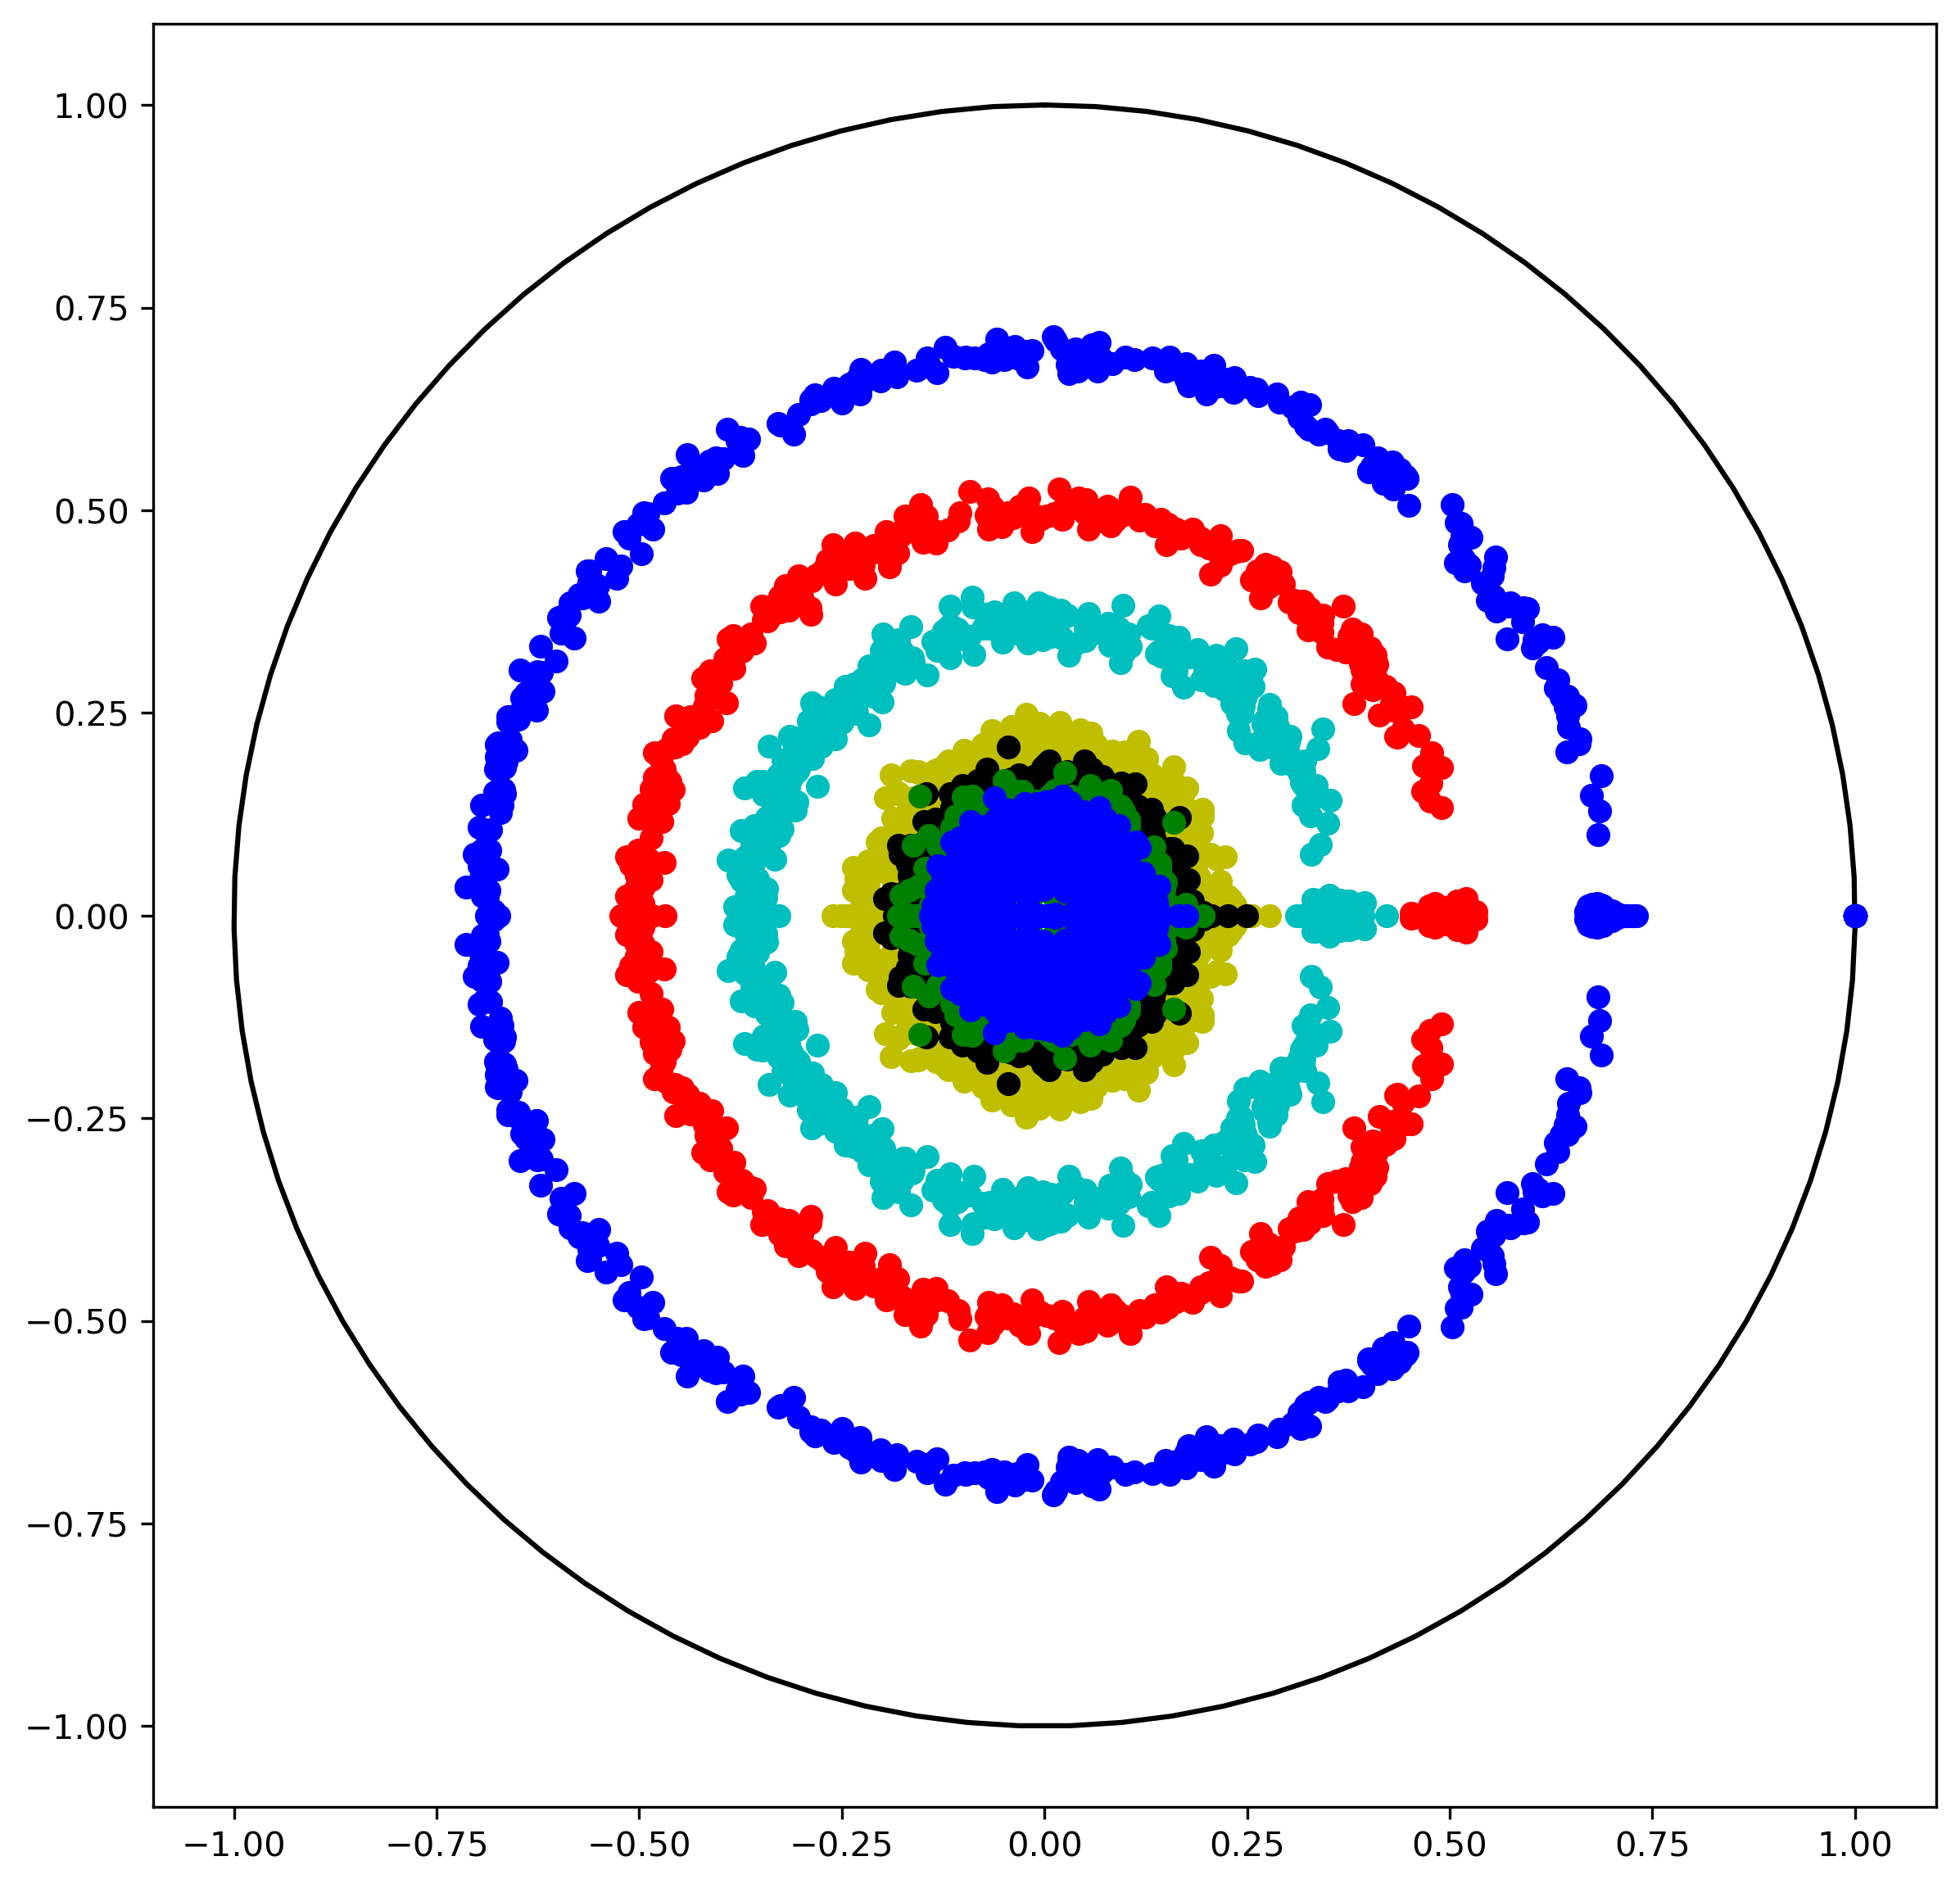

In [4]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

for spectrum in spectrum_list1:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo")
    
for spectrum in spectrum_list2:
    plt.plot(spectrum[:,0], spectrum[:,1], "ro")
    
for spectrum in spectrum_list3:
    plt.plot(spectrum[:,0], spectrum[:,1], "co")

for spectrum in spectrum_list4:
    plt.plot(spectrum[:,0], spectrum[:,1], "yo")
    
for spectrum in spectrum_list5:
    plt.plot(spectrum[:,0], spectrum[:,1], "ko")
    
for spectrum in spectrum_list6:
    plt.plot(spectrum[:,0], spectrum[:,1], "go")
    
for spectrum in spectrum_list7:
    plt.plot(spectrum[:,0], spectrum[:,1], "bo")


plt.show()

In [5]:
results1 = find_outer_inner_R([spectrum_list1[i][:-1] for i in range(10)])
results2 = find_outer_inner_R([spectrum_list2[i][:-1] for i in range(10)])
results3 = find_outer_inner_R([spectrum_list3[i][:-1] for i in range(10)])
results4 = find_outer_inner_R([spectrum_list4[i][:-1] for i in range(10)])
results5 = find_outer_inner_R([spectrum_list5[i][:-1] for i in range(10)])
results6 = find_outer_inner_R([spectrum_list6[i][:-1] for i in range(10)])
results7 = find_outer_inner_R([spectrum_list7[i][:-1] for i in range(10)])
results8 = find_outer_inner_R([spectrum_list8[i][:-1] for i in range(10)])

results = results1 + results2 + results3 + results4 + results5 + results6 + results7 + results8
results = np.array(results).reshape(-1, 4)

R_plus      = results[:,0]
R_minus     = results[:,1]
R_plus_std  = results[:,2]
R_minus_std = results[:,3]

x = [8,16,24,32,40,48,56,64]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


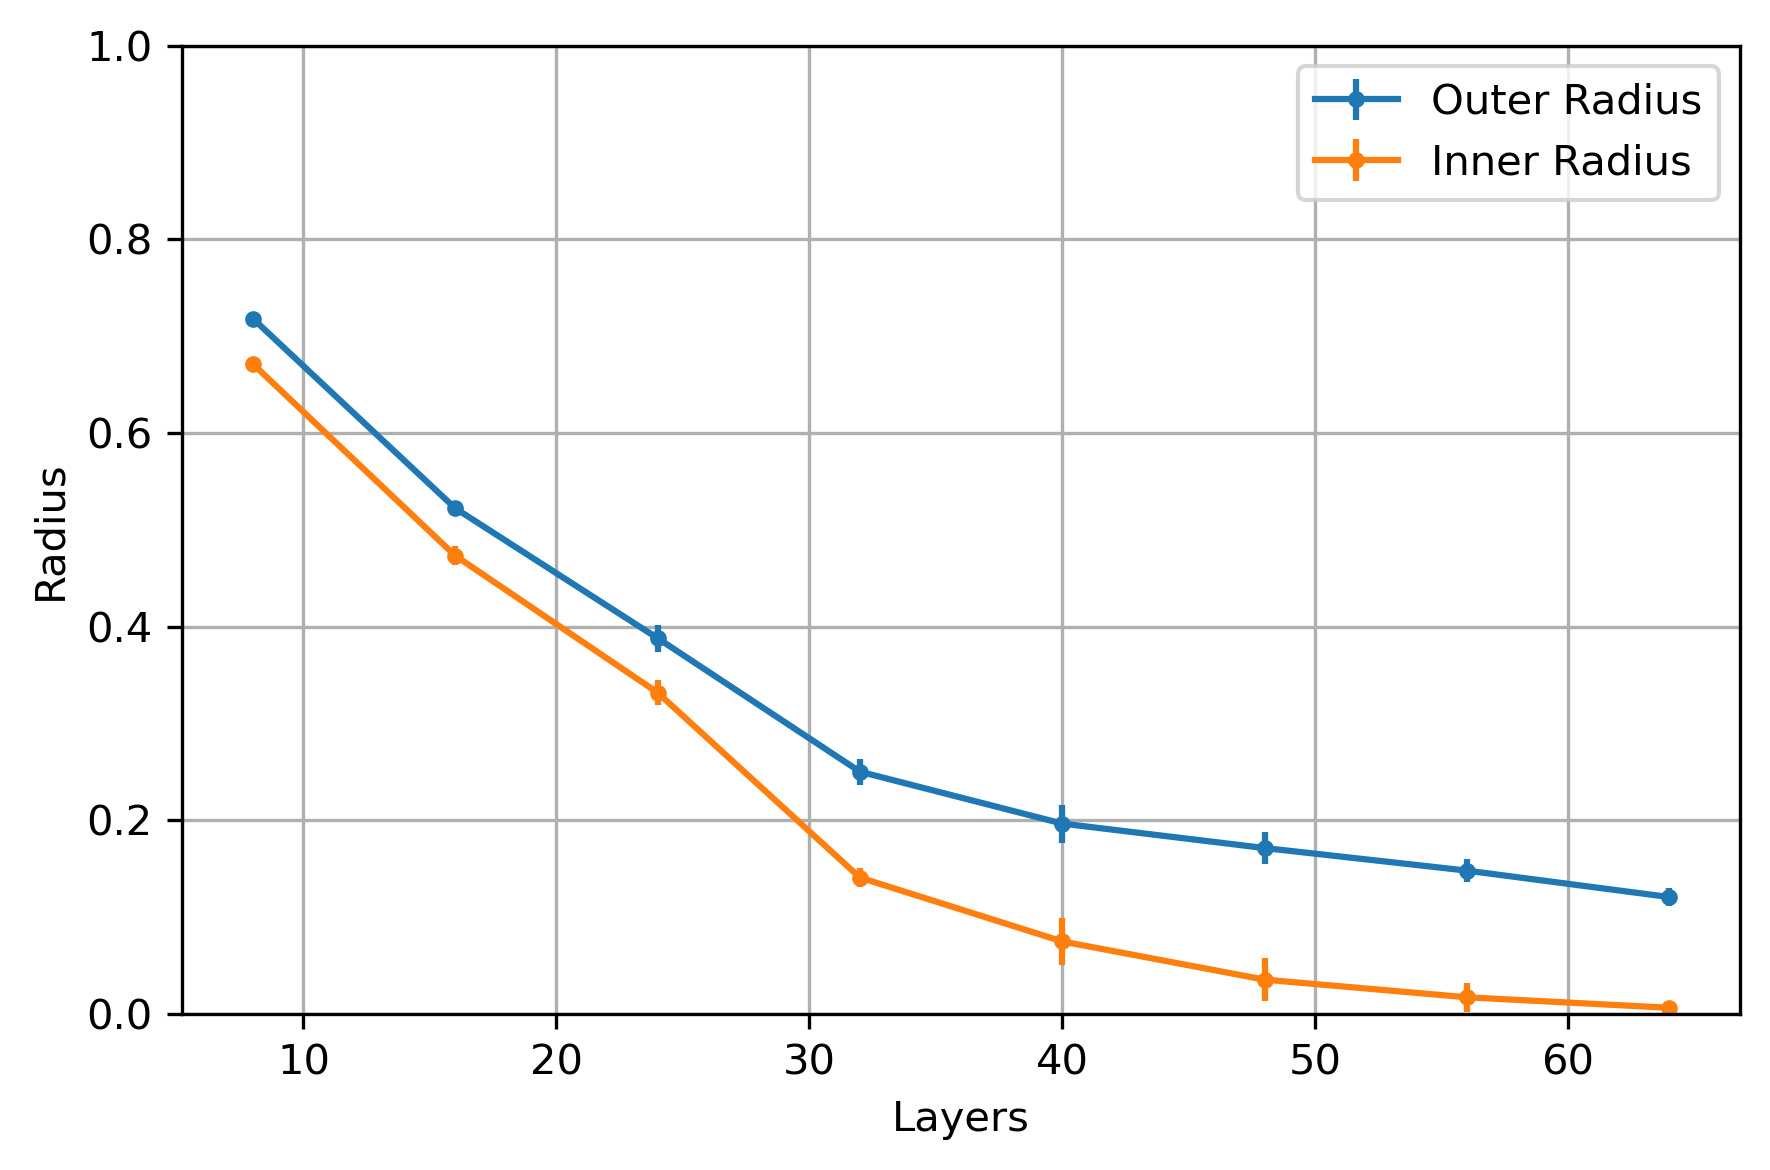

In [6]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x, R_plus, yerr=R_plus_std, fmt="-o", markersize=3)
plt.errorbar(x, R_minus, yerr=R_minus_std, fmt="-o", markersize=3)
plt.ylim([0,1])
plt.grid()
plt.xlabel("Layers")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/"+"belem_3qubit_repeated.pdf")
plt.show()

## Four Qubits, Repeated

In [7]:
[model1, model2, model3, model4, model5] = loader("../../../data/" + "belem_4qubit_repeated.model")

In [8]:
spectrum1 = channel_spectrum(model1.channel, use_coords=True)
spectrum2 = channel_spectrum(model2.channel, use_coords=True)
spectrum3 = channel_spectrum(model3.channel, use_coords=True)
spectrum4 = channel_spectrum(model4.channel, use_coords=True)
spectrum5 = channel_spectrum(model5.channel, use_coords=True)

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


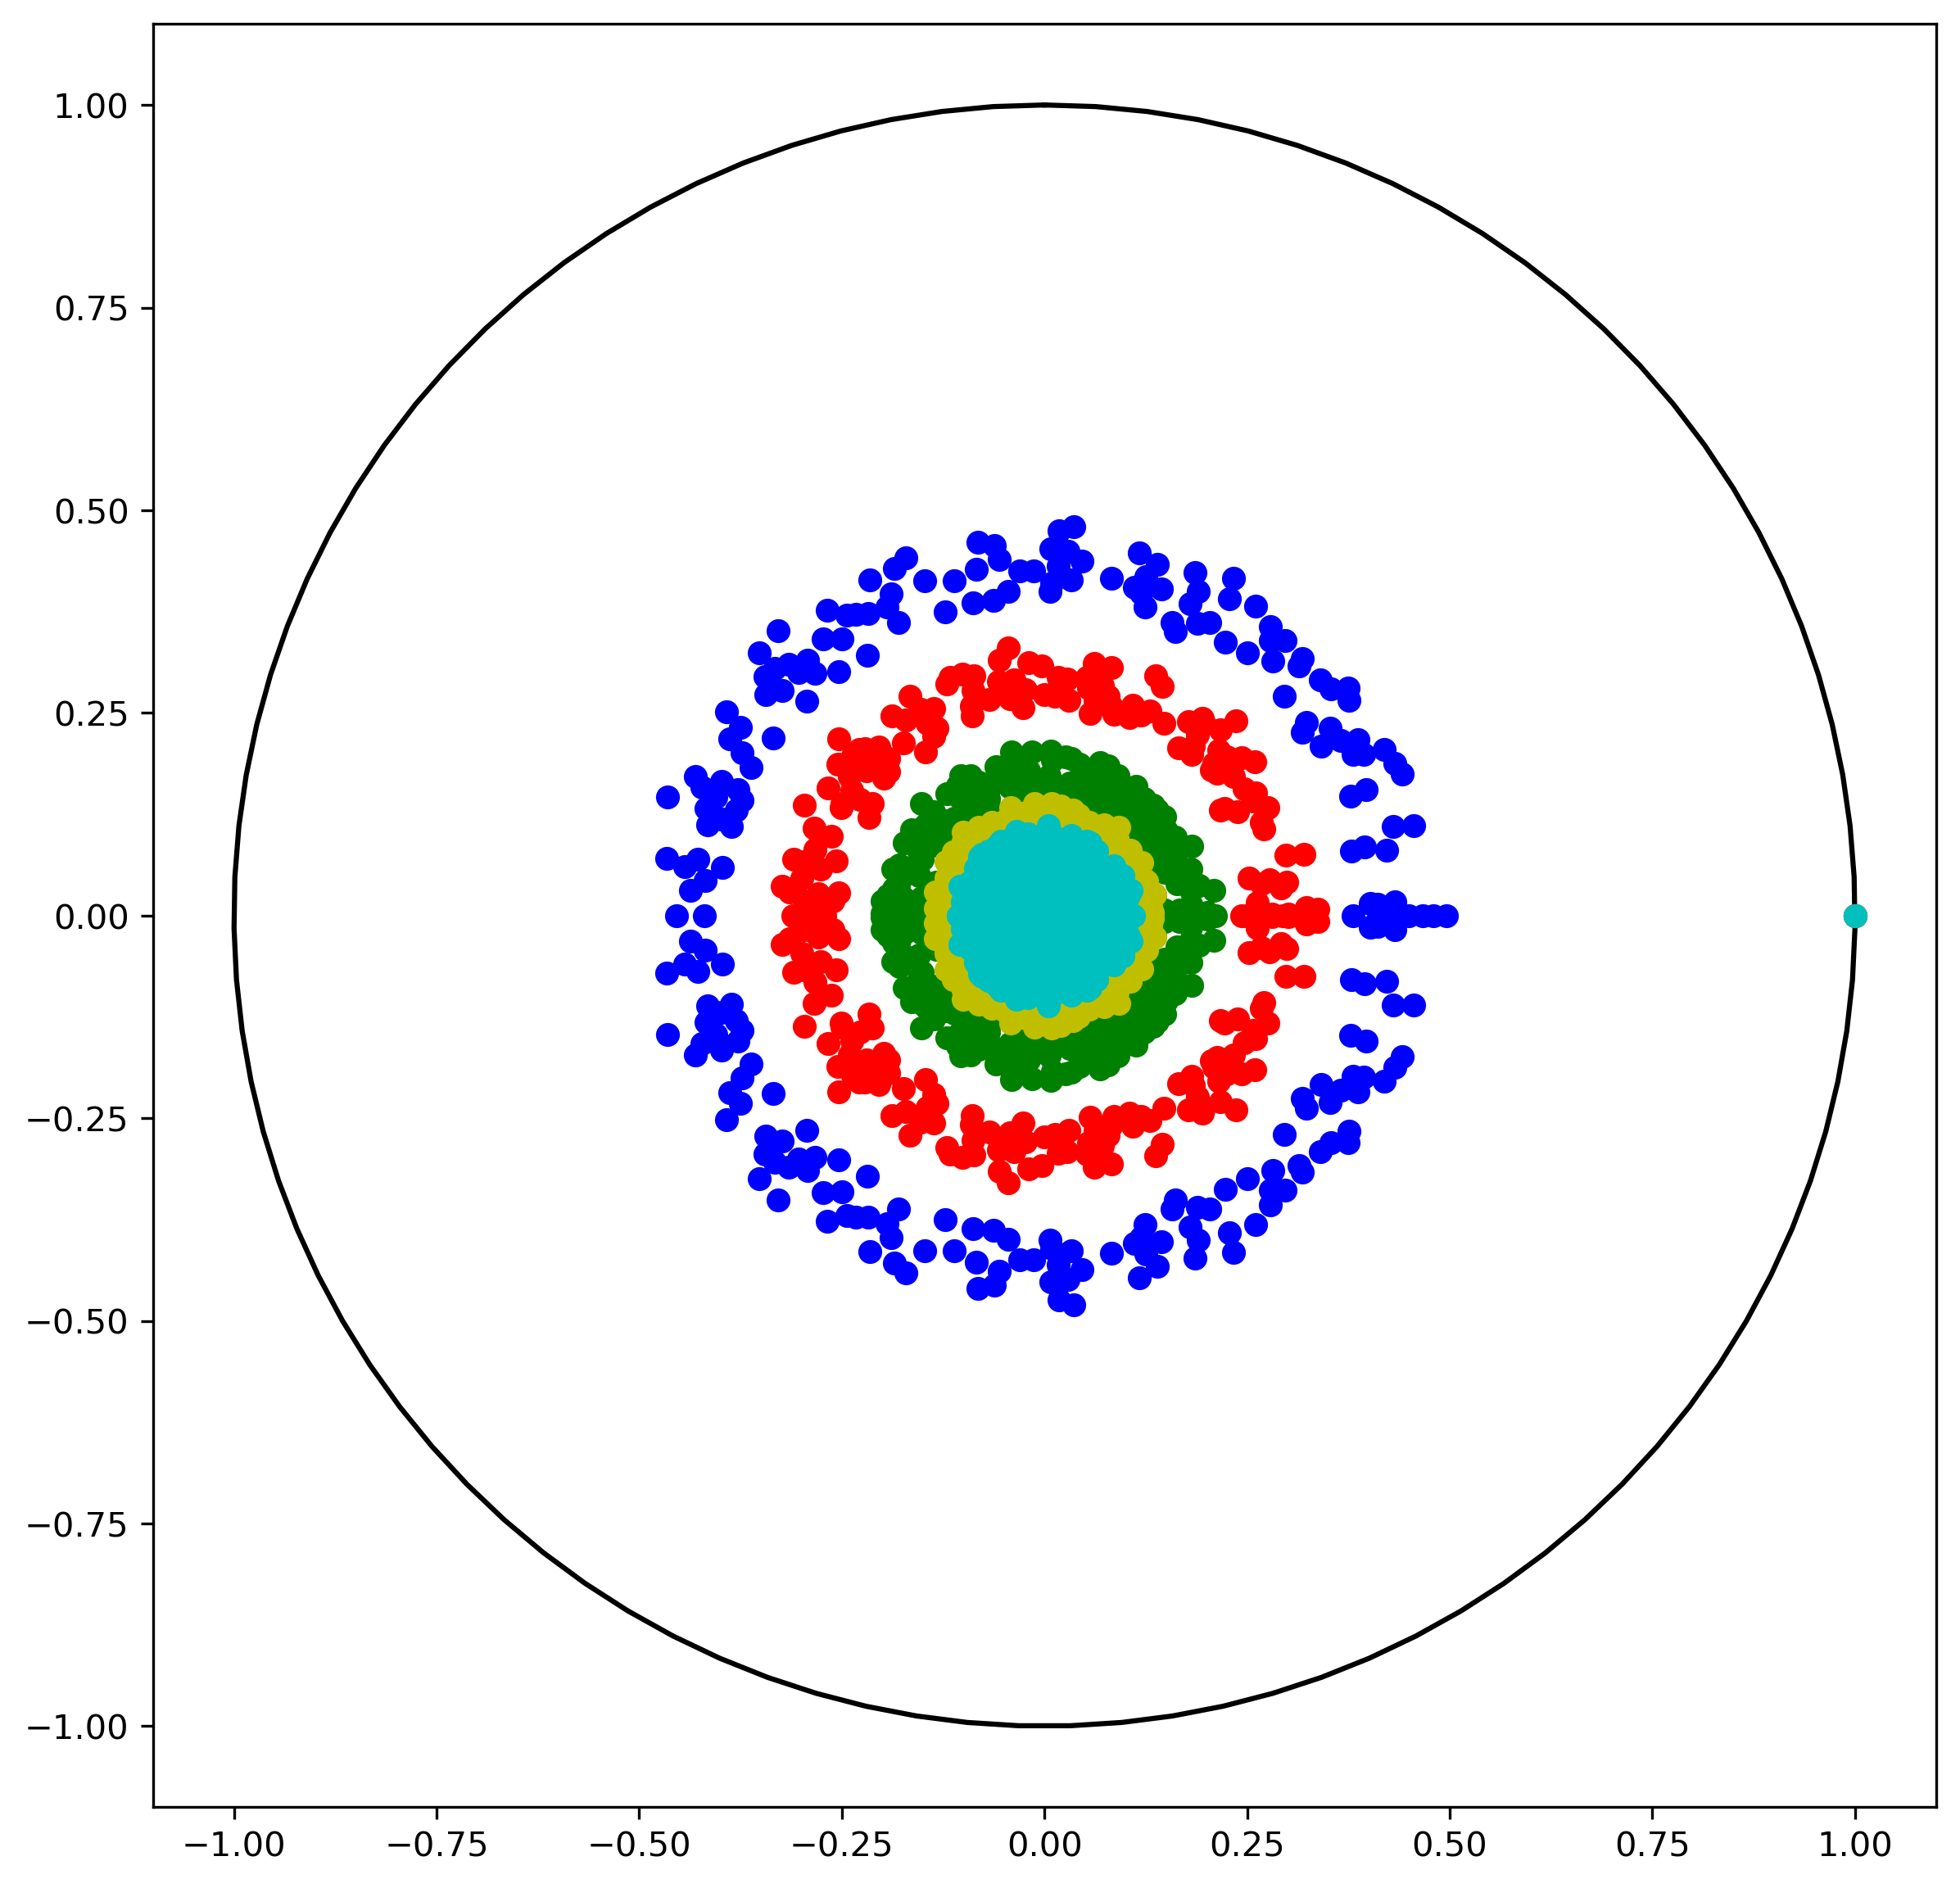

In [9]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum2[:,0], spectrum2[:,1], "ro")
plt.plot(spectrum3[:,0], spectrum3[:,1], "go")
plt.plot(spectrum4[:,0], spectrum4[:,1], "yo")
plt.plot(spectrum5[:,0], spectrum5[:,1], "co")
#plt.legend(["_","8","16", "24", "32", "40"])

In [10]:
x = [8, 16, 24, 32, 40]

results1 = find_outer_inner_R(spectrum1[:-1], tail_num=10)
results2 = find_outer_inner_R(spectrum2[:-1], tail_num=10)
results3 = find_outer_inner_R(spectrum3[:-1], tail_num=10)
results4 = find_outer_inner_R(spectrum4[:-1], tail_num=10)
results5 = find_outer_inner_R(spectrum5[:-1], tail_num=10)

results = results1 + results2 + results3 + results4 + results5
results = np.array(results).reshape(-1, 4)

R_plus      = results[:,0]
R_minus     = results[:,1]
R_plus_std  = results[:,2]
R_minus_std = results[:,3]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


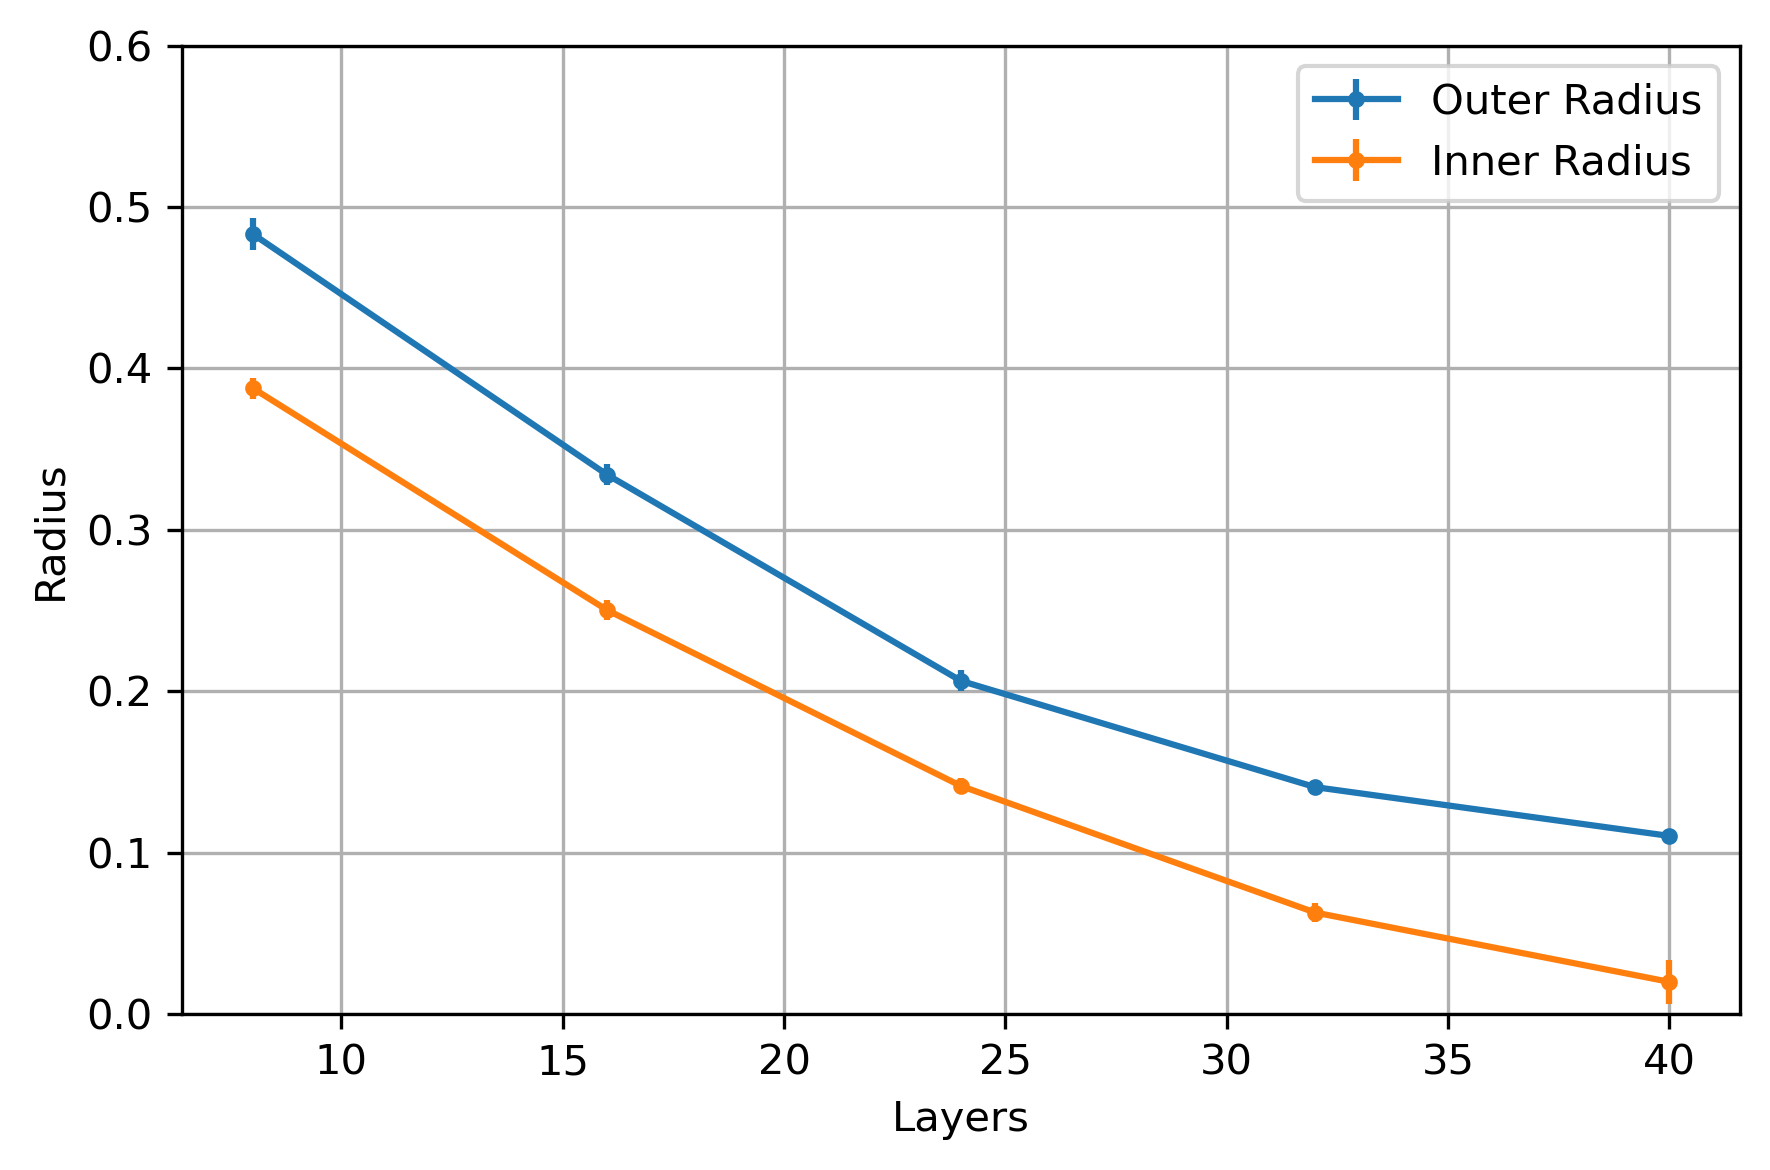

In [11]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x, R_plus, yerr=2*R_plus_std, fmt="-o", markersize=3)
plt.errorbar(x, R_minus, yerr=2*R_minus_std, fmt="-o", markersize=3)
#plt.plot(x, R_plus-R_minus, "o")
plt.ylim([0,0.6])
plt.grid()
plt.xlabel("Layers")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/" + "belem_4qubit_repeated.pdf")
plt.savefig("figures/" + "belem_4qubit_repeated.png")
plt.show()

## Three Qubits, Delay

In [12]:
[model_list1, model_list2, model_list3, model_list4, model_list5, model_list6] = loader("../../../data/" + "belem_3qubit_delay.model")

In [13]:
spectrum_list1 = [channel_spectrum(model.channel, use_coords=True) for model in model_list1]
spectrum_list2 = [channel_spectrum(model.channel, use_coords=True) for model in model_list2]
spectrum_list3 = [channel_spectrum(model.channel, use_coords=True) for model in model_list3]
spectrum_list4 = [channel_spectrum(model.channel, use_coords=True) for model in model_list4]
spectrum_list5 = [channel_spectrum(model.channel, use_coords=True) for model in model_list5]
spectrum_list6 = [channel_spectrum(model.channel, use_coords=True) for model in model_list6]

In [14]:
results1 = find_outer_inner_R([spectrum_list1[i][:-1] for i in range(5)])
results2 = find_outer_inner_R([spectrum_list2[i][:-1] for i in range(5)])
results3 = find_outer_inner_R([spectrum_list3[i][:-1] for i in range(5)])
results4 = find_outer_inner_R([spectrum_list4[i][:-1] for i in range(5)])
results5 = find_outer_inner_R([spectrum_list5[i][:-1] for i in range(5)])
results6 = find_outer_inner_R([spectrum_list6[i][:-1] for i in range(5)])

results = results1 + results2 + results3 + results4 + results5 + results6
results = np.array(results).reshape(-1, 4)

R_plus_3q      = results[:,0]
R_minus_3q     = results[:,1]
R_plus_std_3q  = results[:,2]
R_minus_std_3q = results[:,3]

x_3q = [0,5,10,15,20,25]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


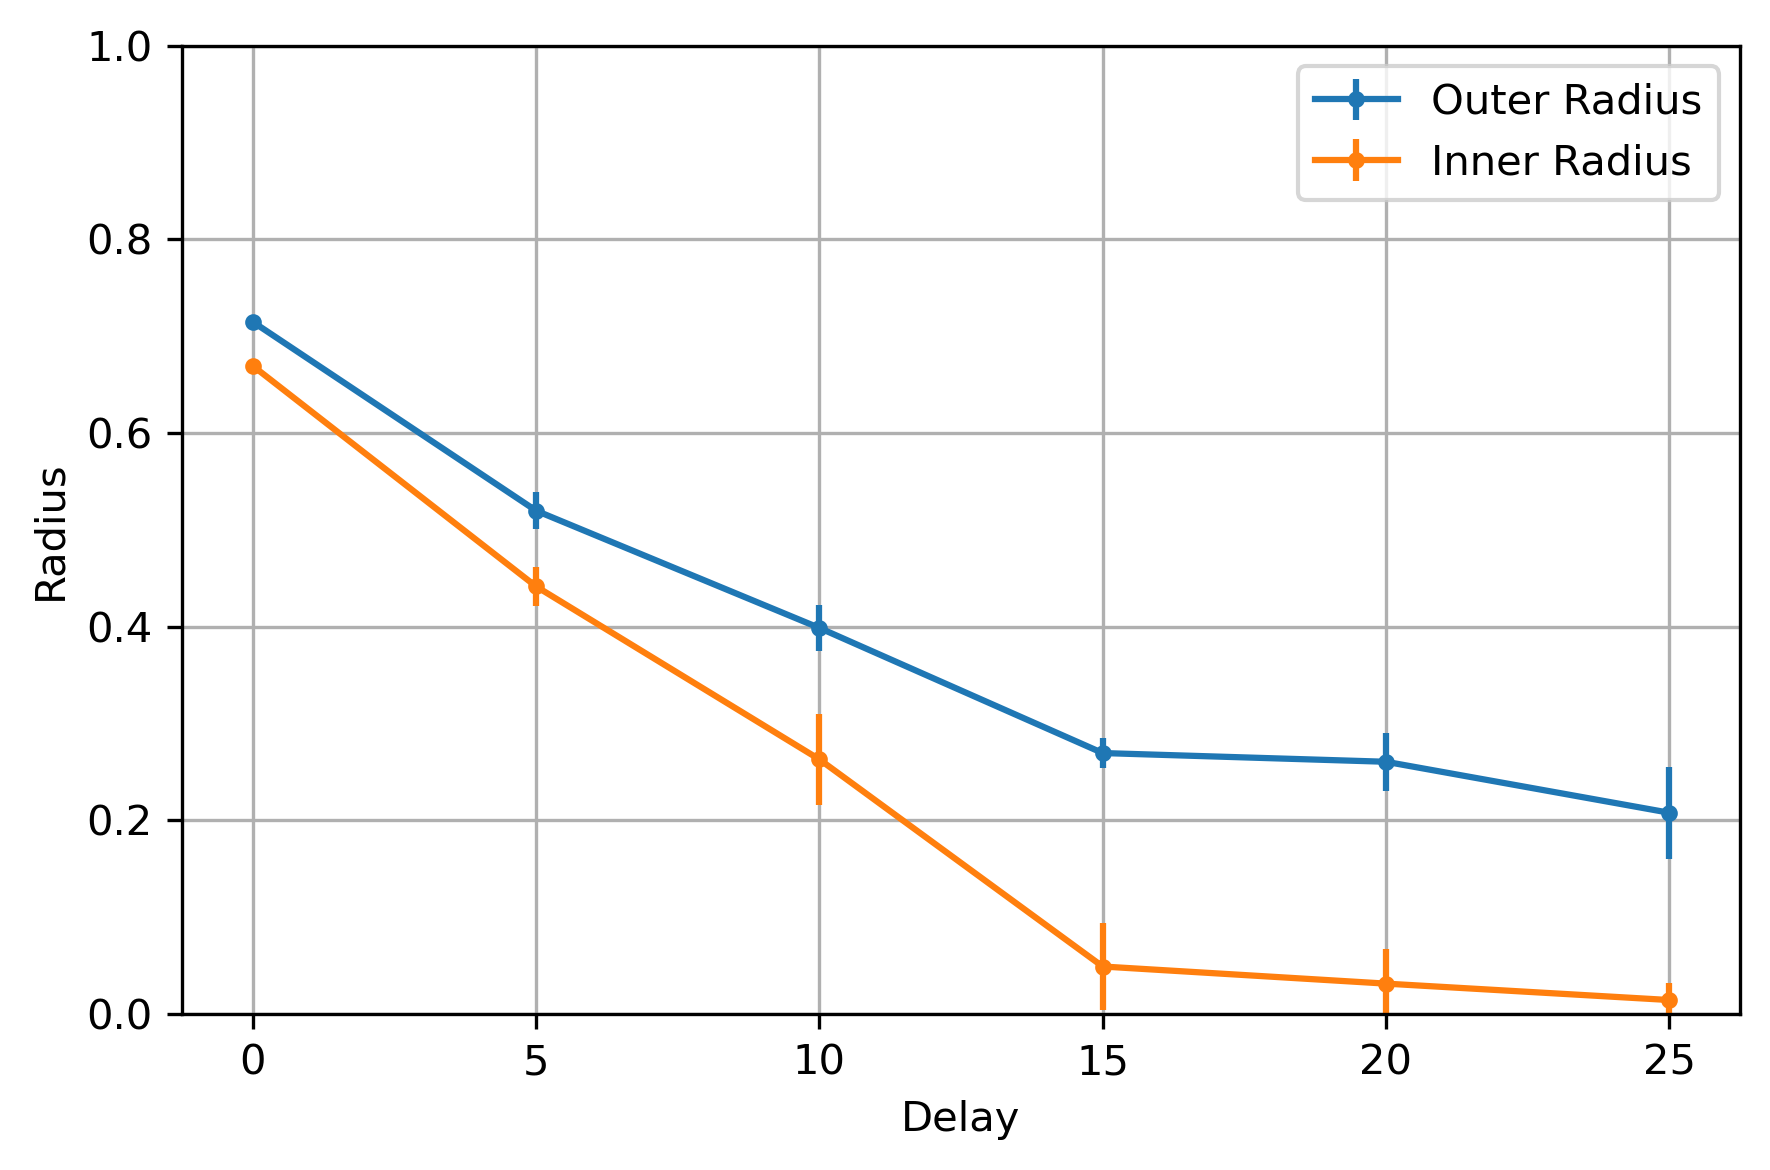

In [15]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x_3q, R_plus_3q, yerr= R_plus_std_3q, fmt="-o", markersize=3)
plt.errorbar(x_3q, R_minus_3q, yerr= R_minus_std_3q, fmt="-o", markersize=3)
plt.ylim([0, 1])
plt.grid()
plt.xlabel("Delay")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/" + "belem_3qubit_delay.pdf")
plt.show()

## Four Qubits, Delay

In [16]:
[model1, model2, model3, model4, model5, model6, model7, model8, model9] = loader("../../../data/" + "belem_4qubit_delay.model")

In [17]:
spectrum1 = channel_spectrum(model1.channel, use_coords=True)
spectrum2 = channel_spectrum(model2.channel, use_coords=True)
spectrum3 = channel_spectrum(model3.channel, use_coords=True)
spectrum4 = channel_spectrum(model4.channel, use_coords=True)
spectrum5 = channel_spectrum(model5.channel, use_coords=True)
spectrum6 = channel_spectrum(model6.channel, use_coords=True)
spectrum7 = channel_spectrum(model7.channel, use_coords=True)
spectrum8 = channel_spectrum(model8.channel, use_coords=True)
spectrum9 = channel_spectrum(model9.channel, use_coords=True)

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\krist\AppData\Local\Temp\ipykernel_1248\1750760050.py:13: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000015544EC9930> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "0 mu Delay", "5 mu", "10 mu", "15 mu", "20 mu"])


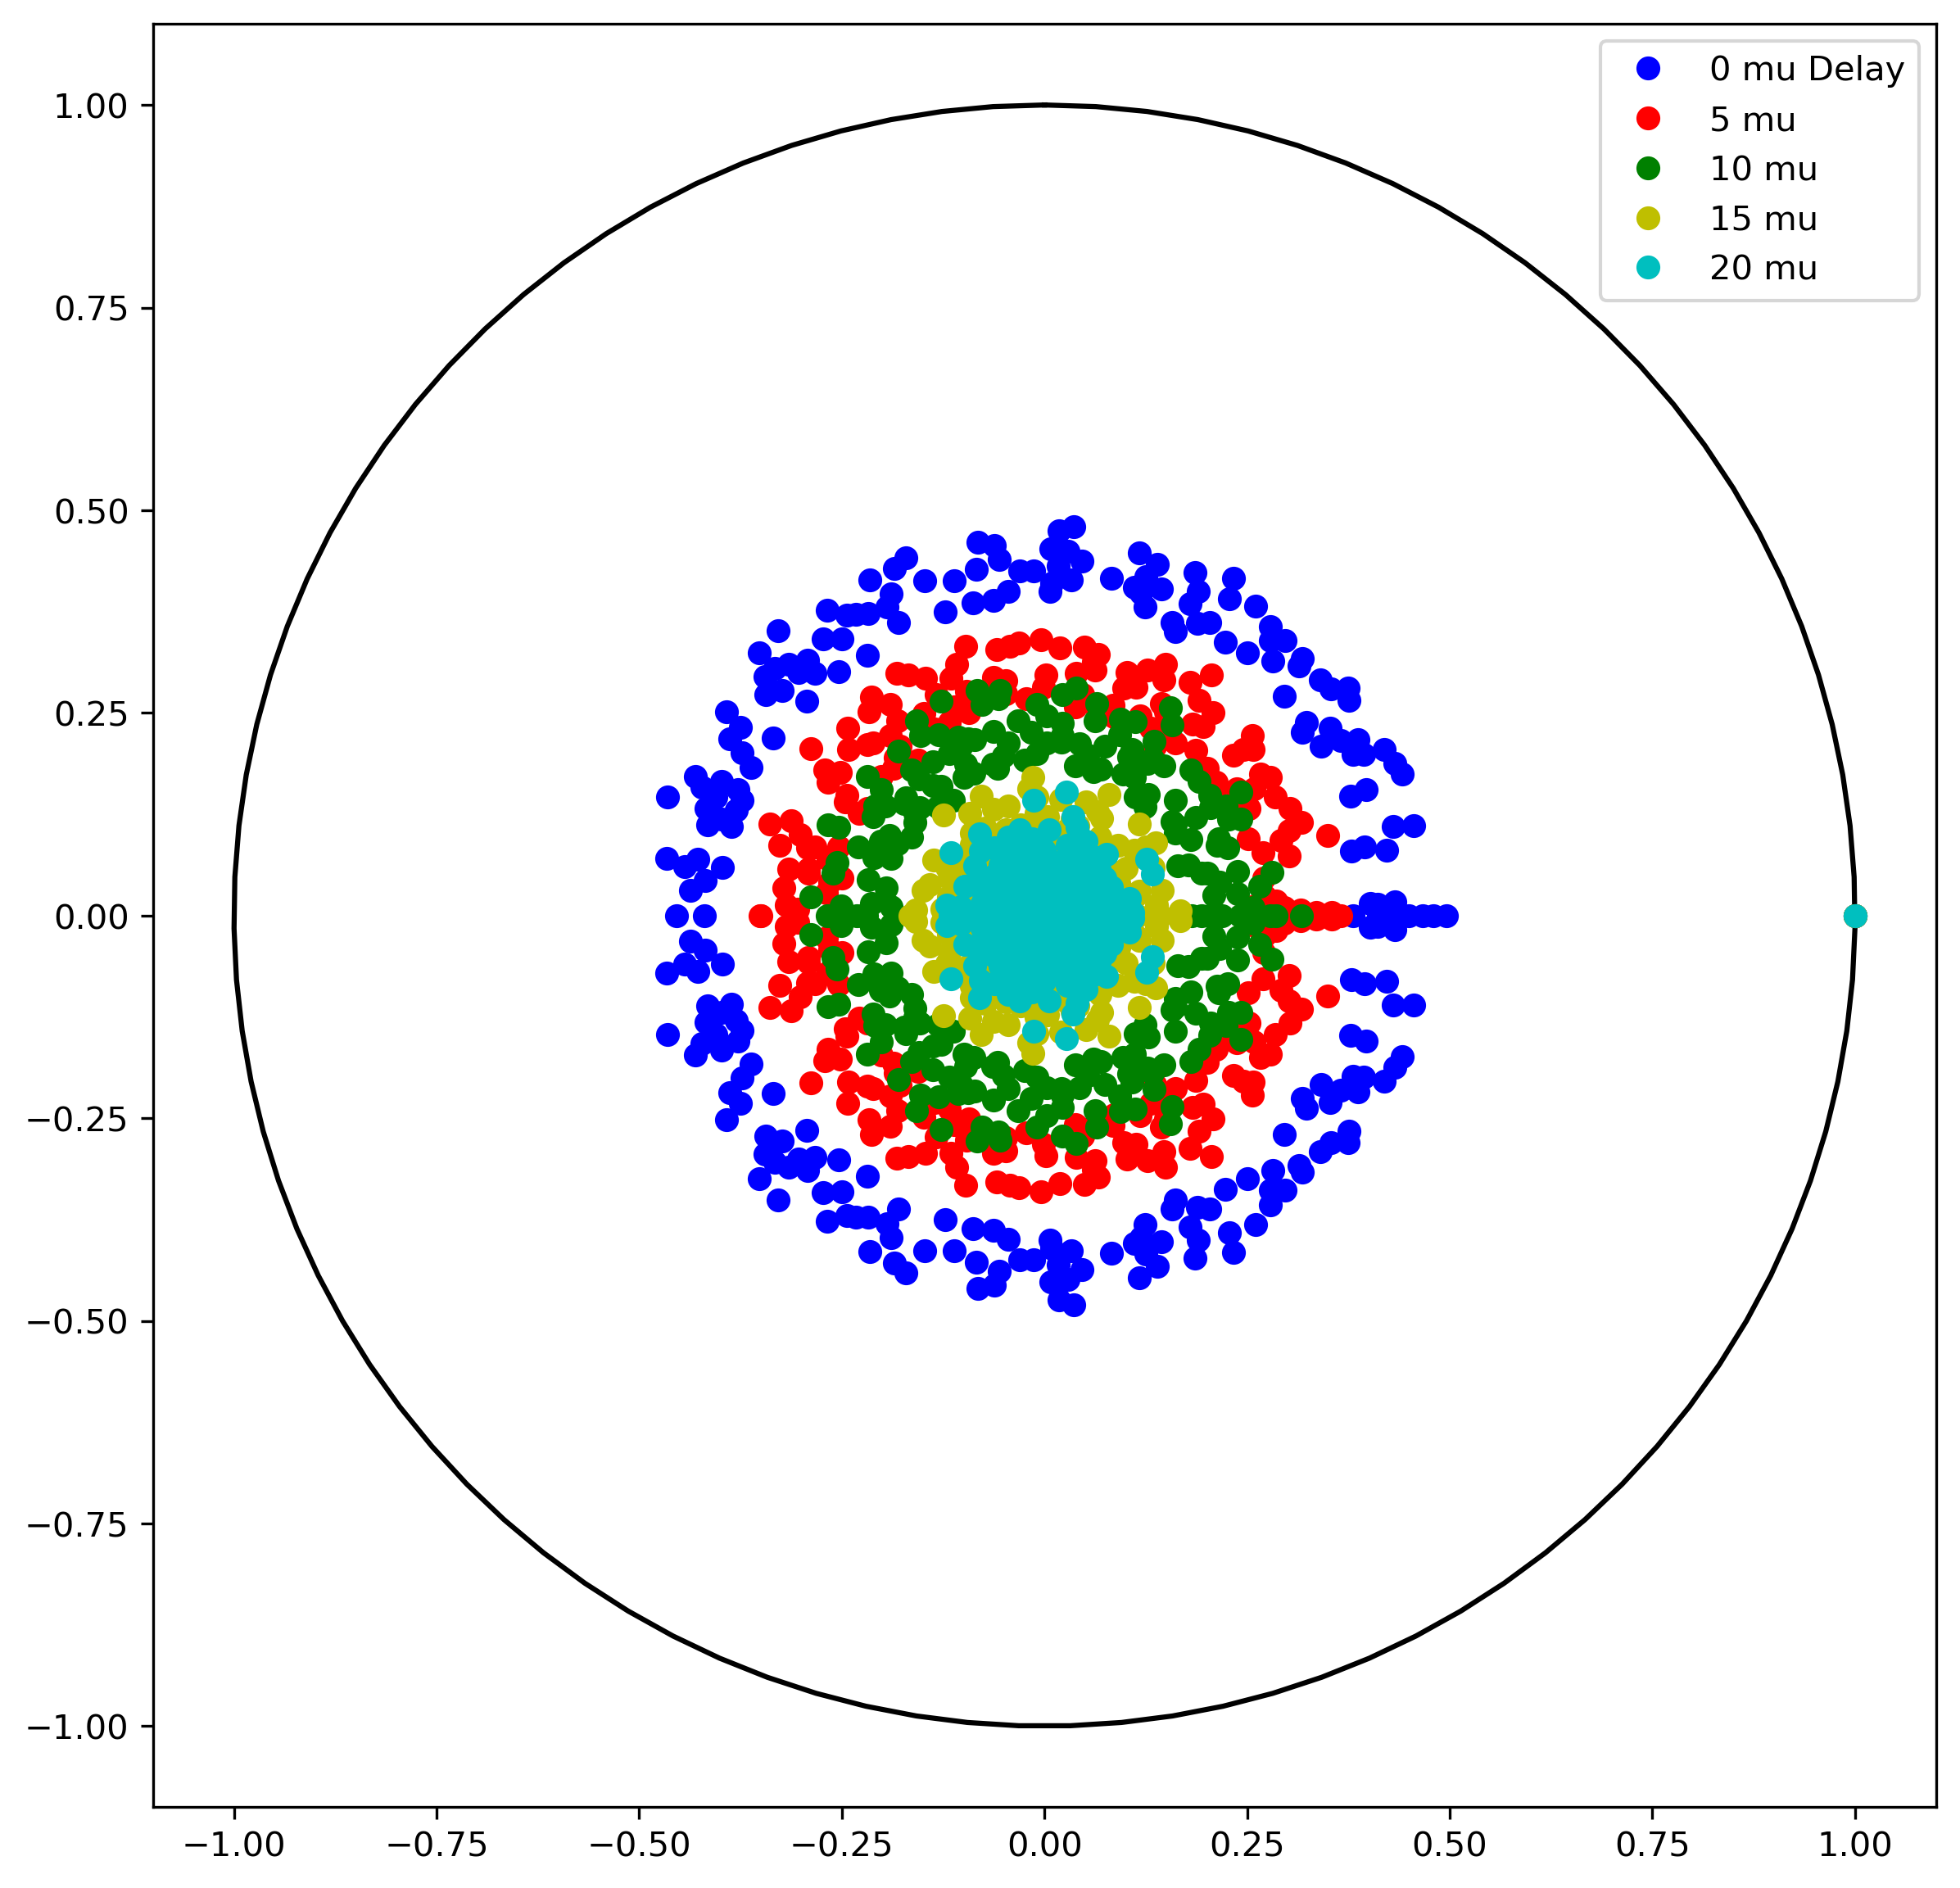

In [18]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")
plt.plot(spectrum1[:,0], spectrum1[:,1], "bo")
plt.plot(spectrum2[:,0], spectrum2[:,1], "ro")
plt.plot(spectrum3[:,0], spectrum3[:,1], "go")
plt.plot(spectrum6[:,0], spectrum6[:,1], "yo")
plt.plot(spectrum8[:,0], spectrum8[:,1], "co")
plt.legend(["_", "0 mu Delay", "5 mu", "10 mu", "15 mu", "20 mu"])

In [19]:
x_4q = [0, 5, 7.5, 10, 11.25, 12.5, 15, 17.5, 20]

results1 = find_outer_inner_R(spectrum1[:-1], tail_num=10)
results2 = find_outer_inner_R(spectrum2[:-1], tail_num=10)
results3 = find_outer_inner_R(spectrum3[:-1], tail_num=10)
results4 = find_outer_inner_R(spectrum4[:-1], tail_num=10)
results5 = find_outer_inner_R(spectrum5[:-1], tail_num=10)
results6 = find_outer_inner_R(spectrum6[:-1], tail_num=10)
results7 = find_outer_inner_R(spectrum7[:-1], tail_num=10)
results8 = find_outer_inner_R(spectrum8[:-1], tail_num=10)
results9 = find_outer_inner_R(spectrum9[:-1], tail_num=10)



results = results1 + results2 + results3 + results4 + results5 + results6 + results7 + results8 + results9
results = np.array(results).reshape(-1, 4)

R_plus_4q      = results[:,0]
R_minus_4q     = results[:,1]
R_plus_std_4q  = results[:,2]
R_minus_std_4q = results[:,3]

c:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


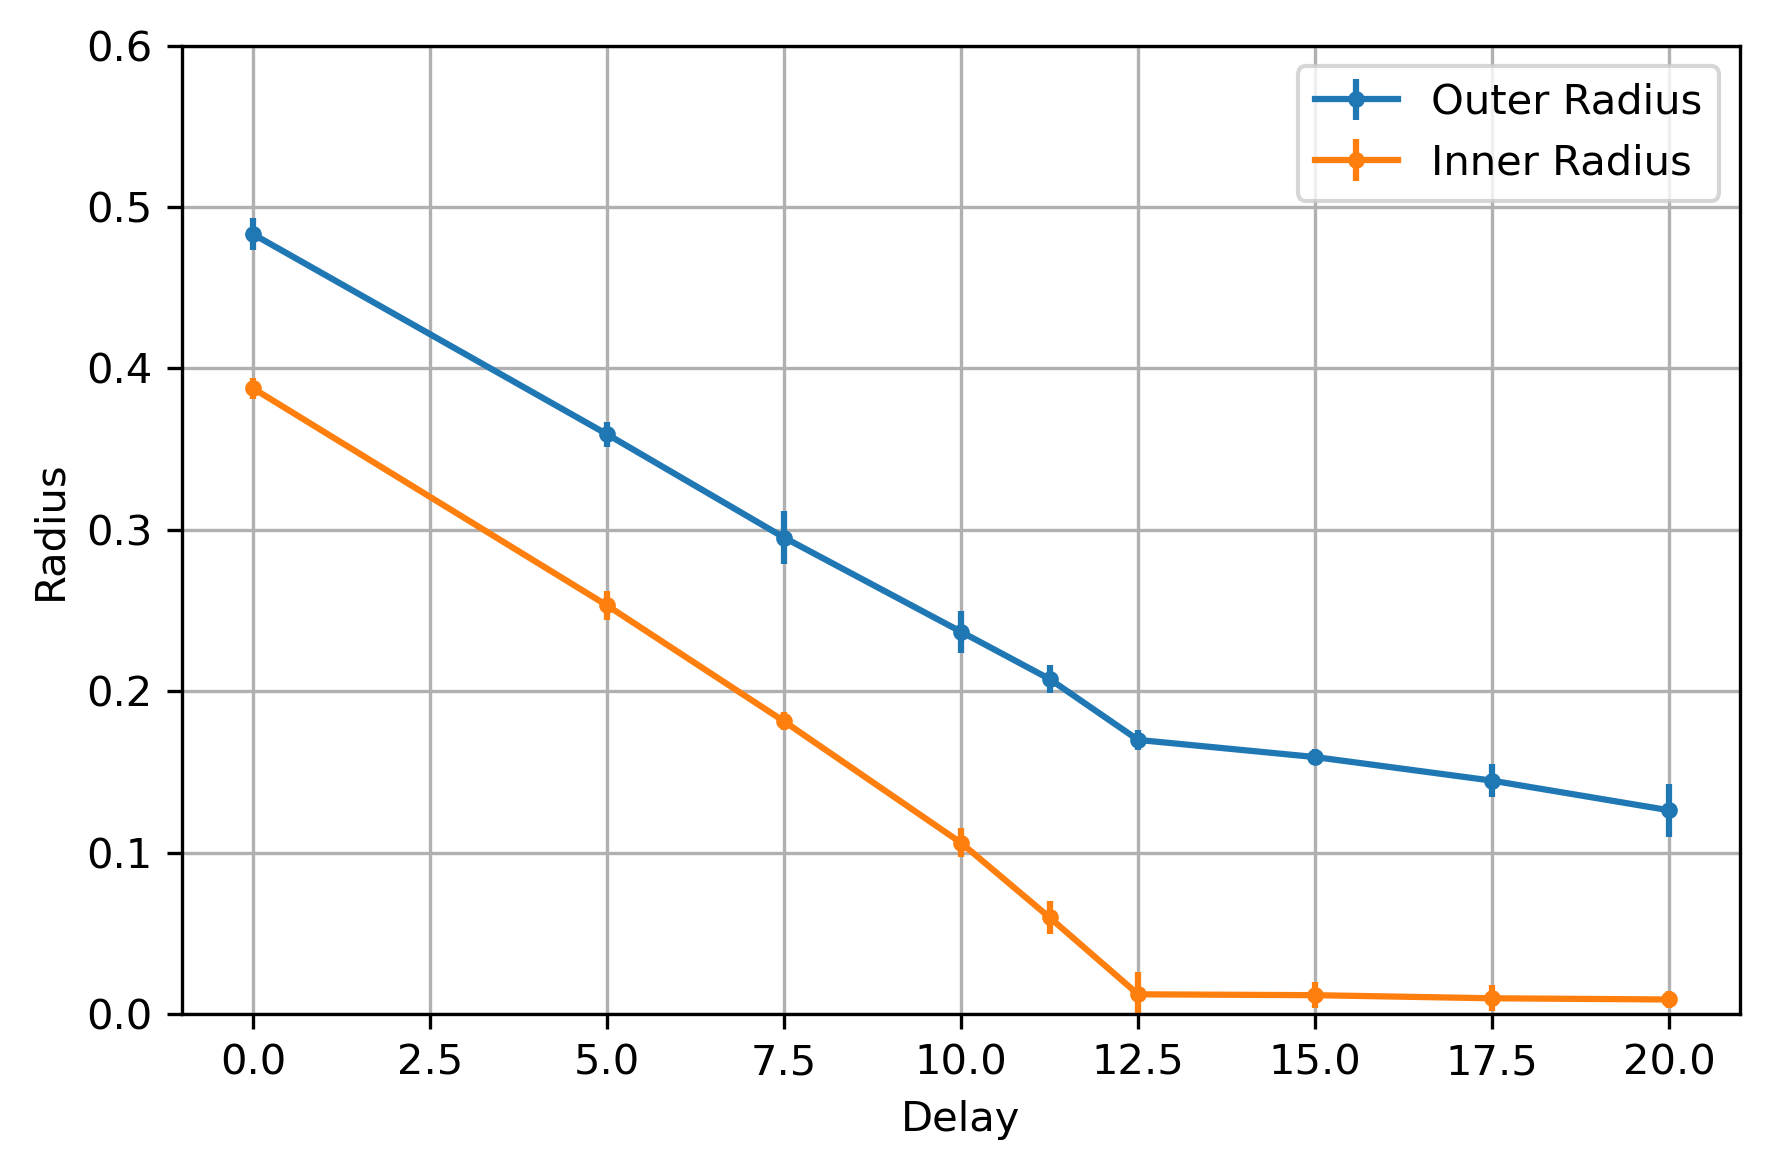

In [20]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.errorbar(x_4q, R_plus_4q, yerr=2*R_plus_std_4q, fmt="-o", markersize=3)
plt.errorbar(x_4q, R_minus_4q, yerr=2*R_minus_std_4q, fmt="-o", markersize=3)
#plt.plot(x, R_plus-R_minus, "o")
plt.ylim([0,0.6])
plt.grid()
plt.xlabel("Delay")
plt.ylabel("Radius")
plt.legend(["Outer Radius", "Inner Radius", "Differance"])
plt.savefig("figures/" + "belem_4qubit_delay.pdf")
plt.savefig("figures/" + "belem_4qubit_delay.png")
plt.show()